Trần Quốc Việt\
2274802011002

câu 1: cho tập dữ liệu wine quality

1. đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên và thông tin về dữ liệu, thống kê mô tả.
2. phân tích khám phá dữ liệu \
    2.1. kiểm tra giá trị thiếu\
    2.2. vẽ histogram cho tất cả các biến và nhận xét \
    2.3. vẽ boxplot cho tất cả các biến và nhận xét \
    2.4. vẽ scatterplot cho "alcohol" và "quality"
3. tính toán ma trận tương quan và vẽ hearmap của ma trận tương quan đó 
4. chia tập dữ liệu thủ công, không dùng thư viện có sẵn. \
    4.1 xáo trộn dữ liệu \
    4.2 chia dữ liệu với 80% train và 20% test\
    4.3 tách dữ liệu \
    4.4 tách đặc trưng và nhãn
5. chuẩn bị dữ liệu \
    5.1 khởi tạo bộ dữ liệu chuẩn hóa \
    5.2 chuẩn hóa huấn luyện\
    5.3 chuẩn hóa kiểm tra
6. ứng dụng mô hình hồi quy tuyến tính 
    6.1 khởi tạo \
    6.2 huấn luyện\
    6.3 dự đoán trên tập kiểm tra
7. đánh giá mô hình,  tính RSE và R^2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
#câu 1: cho tập dữ liệu wine quality
# 1. đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên và thông tin về dữ liệu, thống kê mô tả.
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [52]:
#2. phân tích khám phá dữ liệu 
#2.1. kiểm tra giá trị thiếu
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

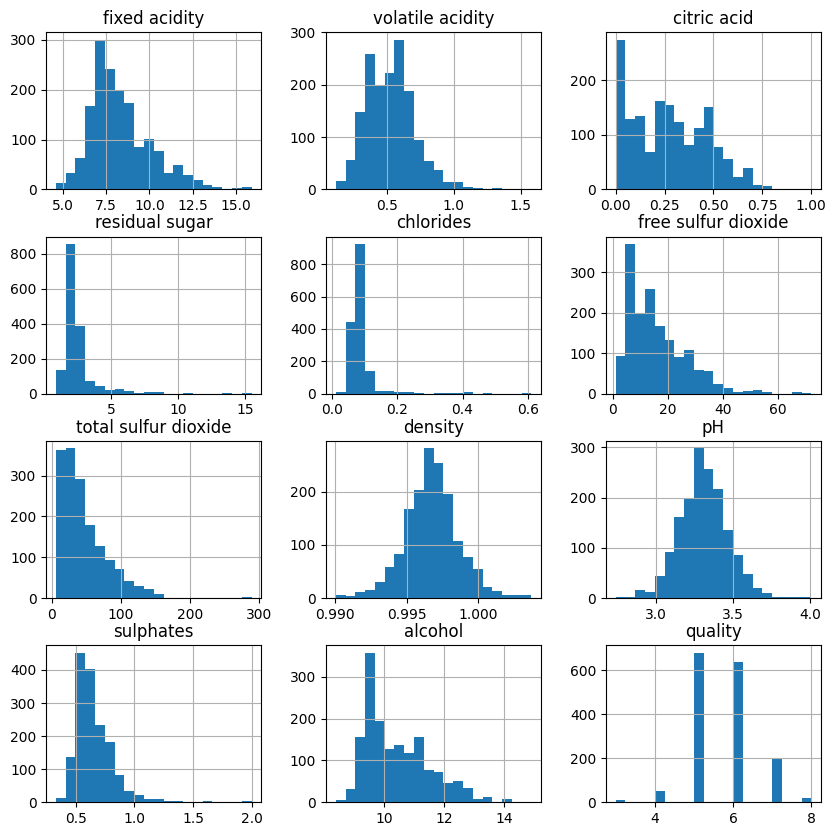

In [53]:
#2.2. vẽ histogram cho tất cả các biến và nhận xét
df.hist(bins=20, figsize=(10,10))
plt.show()


nhận xét:Phân phối các đặc trưng không đồng đều, nhiều biến lệch phải và có thể tồn tại outliers.

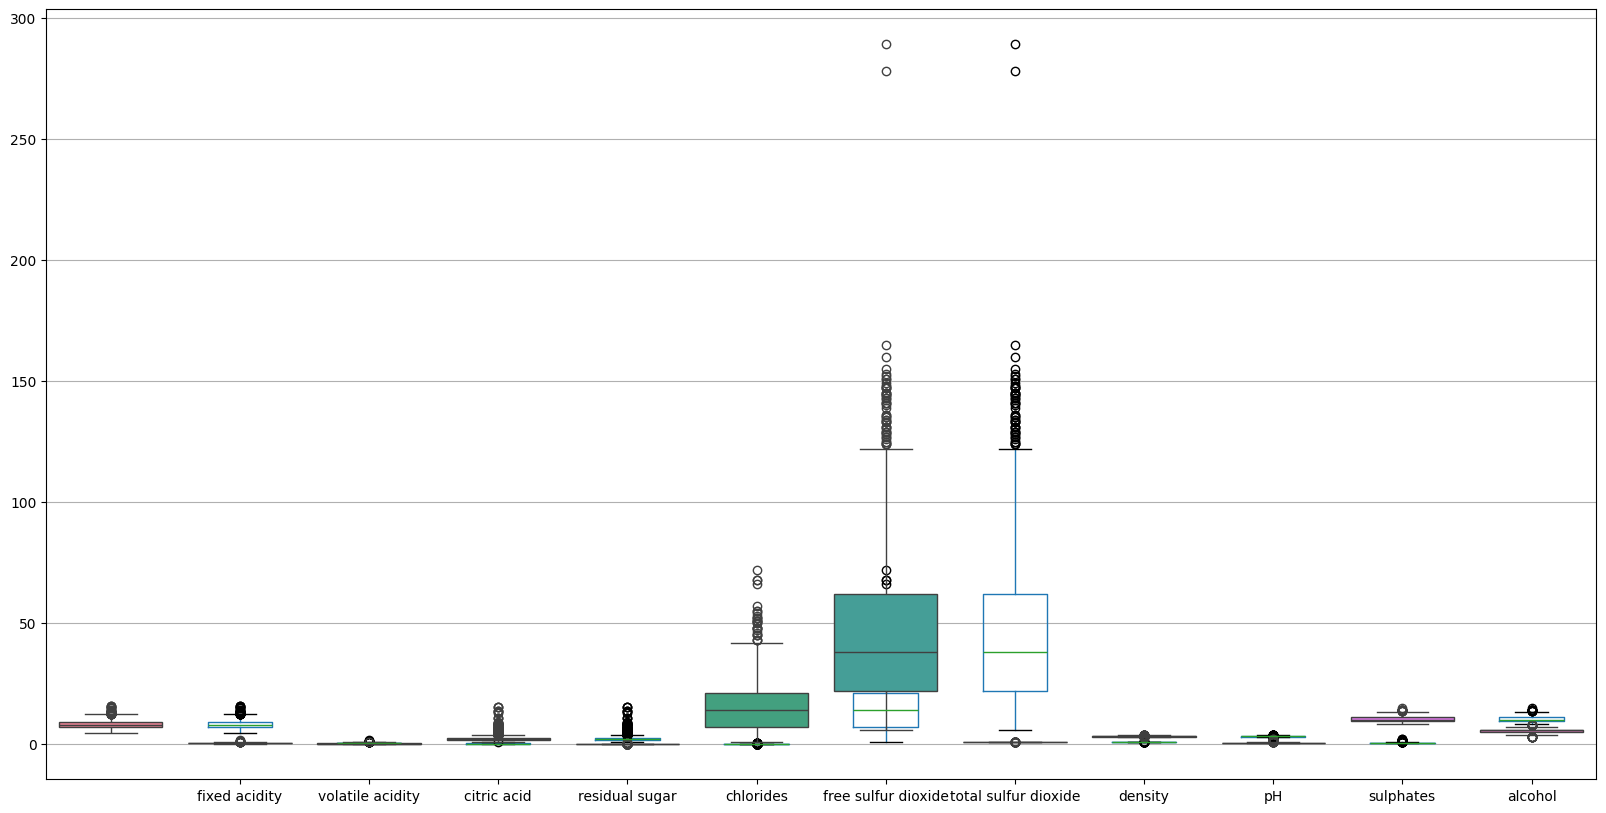

In [57]:
#2.3. vẽ boxplot cho tất cả các biến và nhận xét
df.boxplot(figsize=( 20,10))
sns.boxplot(data=df)
plt.show()


nhận xét: Biểu đồ boxplot cho thấy nhiều biến có outliers rõ rệt, đặc biệt là free sulfur dioxide và total sulfur dioxide, với sự phân tán dữ liệu rộng hơn so với các biến khác.

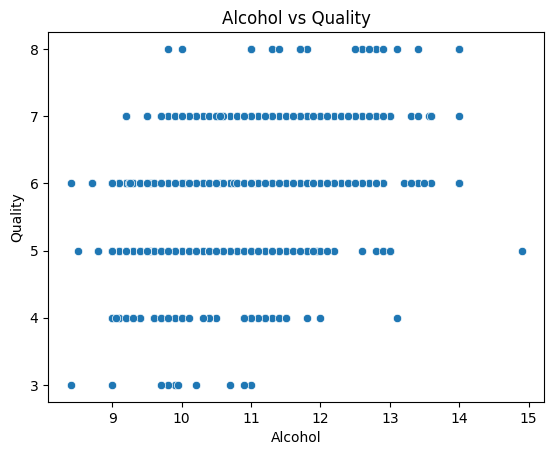

In [60]:
#2.4. vẽ scatterplot cho "alcohol" và "quality"
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs Quality')
plt.show()

nhận xét: Biểu đồ cho thấy chất lượng rượu có xu hướng cải thiện khi nồng độ cồn tăng lên, với rượu có chất lượng cao 7-8 thường có nồng độ cồn lớn hơn so với rượu chất lượng thấp 3-4.

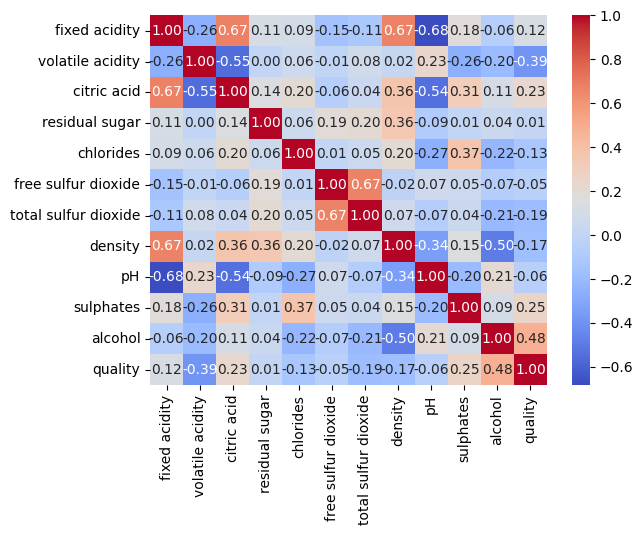

In [61]:
#3. tính toán ma trận tương quan và vẽ hearmap của ma trận tương quan đó
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [63]:
#4. chia tập dữ liệu thủ công, không dùng thư viện có sẵn.
#4.1 xáo trộn dữ liệu
# 2. Xáo trộn dữ liệu
np.random.seed(42)
xiao = np.random.permutation(len(df))
df = df.iloc[xiao]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


In [64]:
#4.2 chia dữ liệu với 80% train và 20% test
test_size = int(0.2* len(df))
train_size = 1 - test_size


In [65]:
#4.3 tách dữ liệu 
train = df[:train_size]
test = df[train_size:]
train.shape, test.shape


((1281, 12), (318, 12))

In [66]:
#4.4 tách đặc trưng và nhãn
X_train = train.drop('quality', axis=1)
y_train = train['quality']
X_test = test.drop('quality', axis=1)
y_test = test['quality']
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((1281, 11), (1281,), (318, 11), (318,))

In [83]:
#5. chuẩn bị dữ liệu 
#5.1 khởi tạo bộ dữ liệu chuẩn hóa 
scaler= StandardScaler()

In [84]:
#5.2 chuẩn hóa huấn luyện
X_train_scaler = scaler.fit_transform(X_train)


In [85]:
#5.3 chuẩn hóa kiểm tra
X_test_sclaer = scaler.fit_transform(X_test)

In [86]:
#6. ứng dụng mô hình hồi quy tuyến tính 
#6.1 khởi tạo \
model= LinearRegression()
model

LinearRegression()

In [87]:
#6.2 huấn luyện\
model.fit(X_train, y_train)


LinearRegression()

In [88]:
#6.3 dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_sclaer)
y_pred

array([5.33882438, 5.38368197, 5.82892332, 5.76367855, 6.20070103,
       5.65360444, 5.52179493, 6.03718575, 5.3888774 , 5.54246816,
       5.75690967, 5.35601588, 6.07304432, 5.31947663, 5.63640084,
       6.27482038, 5.21989038, 4.93869792, 6.53956039, 5.74832839,
       5.91573408, 6.15404561, 5.14065403, 5.81310647, 5.91963922,
       5.01748936, 5.03217672, 6.00759923, 5.71912066, 6.67749701,
       5.20255197, 5.85555389, 6.31527108, 5.18287578, 5.41461632,
       6.32628119, 6.25679035, 5.6932961 , 5.874557  , 5.04243923,
       6.26547168, 5.82892332, 5.85549867, 5.26464233, 5.64906862,
       5.5942687 , 5.07072927, 4.96504318, 6.3270064 , 6.17608206,
       4.96530721, 5.3062268 , 5.81681958, 5.74435903, 5.98337536,
       5.40409578, 4.90171312, 5.7115195 , 6.5529828 , 5.53963654,
       5.5026539 , 5.90529487, 6.26400145, 5.32334471, 5.51009951,
       5.47906055, 5.5874784 , 5.73316022, 5.93142508, 5.23549445,
       5.36412767, 5.01959034, 5.37210957, 6.24635887, 6.09935

In [98]:
#7. đánh giá mô hình,  tính RSE và R^2
y_pred = model.predict(X_test_sclaer)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rse = np.sqrt(mse)
r2, rse


(0.4348492428113333, np.float64(0.5858626352037026))

cho bộ dữ liệu sau: how long we live\
1.1 có bao nhiêu cột, hàng\
1.2 danh sách tên của các cột\
1.3 thử dùng ["startus"]\
1.4 có bao nhiêu nước  đang phát triển và bao nhiêu nước phát triển\
1.5 tính min, max, mean, median của alcohol \
1.6\
    đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này\
    lấy danh sách các quốc gia có trình độ học vấn cao hơn mức trung bình và gdp cao hơn mức trung bình


In [3]:
df = pd.read_csv("howlongwelive.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
#có bao nhiêu cột, bao nhiêu hàng
df.shape

(2938, 22)

In [12]:
# danh sách tên của các cột
df.columns.tolist()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [16]:
# thử dùng startus
df['Status']

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object

In [ ]:
#có bao nhiêu nước đang phát triển và phát triển
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [20]:
# Thống kê về lượng tiêu thụ rượu
print("Min:", df['Alcohol'].min())
print("Max:", df['Alcohol'].max())
print("mean:", df['Alcohol'].mean())
print("median :", df['Alcohol'].median())

Min: 0.01
Max: 17.87
mean: 4.602860787172012
median : 3.755


In [24]:
#Bài 1: đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này
avg_alcohol = df['Alcohol'].mean()
high_alcohol_countries = df[df['Alcohol'] > avg_alcohol]['Country'].unique().tolist()
print("Số lượng quốc gia có mức tiêu thụ rượu cao hơn trung bình:", len(high_alcohol_countries))
print("Các quốc gia có mức tiêu thụ rượu cao hơn trung bình:", high_alcohol_countries)


Số lượng quốc gia có mức tiêu thụ rượu cao hơn trung bình: 92
Các quốc gia có mức tiêu thụ rượu cao hơn trung bình: ['Albania', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', "Lao People's Democratic Republic", 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Mongolia', 'Montenegro', 'Namibia', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Rwanda', 'Saint

In [26]:
#Bài 2: lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình
avg_schooling = df['Schooling'].mean()
avg_gdp = df['GDP'].mean()
filtered_countries = df[(df['Schooling'] > avg_schooling) & (df['GDP'] > avg_gdp)]['Country'].tolist()
print("Các quốc gia có trình độ học vấn và GDP cao hơn mức trung bình:", filtered_countries)

Các quốc gia có trình độ học vấn và GDP cao hơn mức trung bình: ['Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Azerbaijan', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Belarus', 'Belarus', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Bot